---

# KDDCUP99_Rev

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import nn

from time import time
from tqdm import tqdm

from sklearn.metrics import roc_auc_score, average_precision_score,auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, auc, precision_recall_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle

import pandas as pd
import os
import sys

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

os.environ['CUDA_VISIBLE_DEVICES'] = '3'

device = torch.device('cuda' if (torch.cuda.is_available()) else 'cpu')

from load_data import get_KDDCUP99_REV
from model_ganomaly import GANomaly

In [2]:
def meanAUC_PRAUC(auc_list, pr_list, name):
    print('AUC:')
    print(auc_list)
    print('**************')
    print('PR AUC:')
    print(pr_list)
    print('**************')
    
    
    AUC_Frame = pd.DataFrame(auc_list, columns = [name])
    PR_AUC_Frame = pd.DataFrame(pr_list, columns = [name])
    
    AUC_Frame.to_csv(f'./auc/{name}.csv', index=False)
    PR_AUC_Frame.to_csv(f'./auc_PR/{name}.csv', index=False)
    
    AUC_Frame = list(AUC_Frame[name])

    N = len(AUC_Frame)
    mean_auc = np.mean(AUC_Frame)
    std_auc = np.std(AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')
    print('**************')
    
    PR_AUC_Frame = list(PR_AUC_Frame[name])

    N = len(PR_AUC_Frame)
    mean_auc = np.mean(PR_AUC_Frame)
    std_auc = np.std(PR_AUC_Frame)
    std_error = std_auc / (np.sqrt(N))

    ci = 1.96 * std_error
    lower_bound = mean_auc - ci
    upper_bound = mean_auc + ci
    
    print('PR AUC')
    print(f'{mean_auc:.2f} +/- {ci:.2f}')
    print(f'95% confidence level, average auc would be between {lower_bound:.2f} and {upper_bound:.2f}')

In [3]:
batch_size = 1024

WORK_SPACE = '../Dataset'
FILE = 'kddcup.data_10_percent_corrected'

DATASET = 'KDDCUP99'

PATH = os.path.join(WORK_SPACE, FILE)

In [4]:
dataset = get_KDDCUP99_REV(PATH, seed, show=True)

97278 normal records, 8752 anormal records
We use 4376 anomalous records
-----------------------------------------------------------------------------------------
There are 81323 records in training set
Training set is composed by 81323 normal records and 0 abnormal records
-----------------------------------------------------------------------------------------
There are 5083 records in validation set
Validation set is composed by 3989 normal records and 1094 abnormal records
-----------------------------------------------------------------------------------------
There are 15248 records in test set
Test set is composed by 11966 normal records and 3282 abnormal records


In [5]:
args = {}
nc = dataset['x_train'].shape[1]
nz = 100
manualseed = -1
print_freq = 100
args['w_adv'] = 1
args['w_con'] = 50
args['w_enc'] = 1
isTrain = True 

#### Mean AUC and standard deviation after seven runs

Iteration: 1
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.031 | g_loss: 0.1156
[INFO] Training phase... Elapsed time: 440 seconds



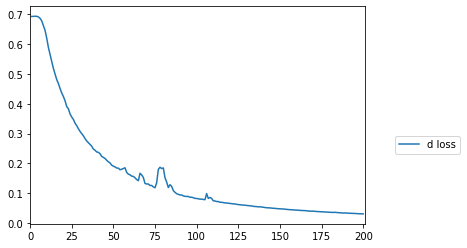

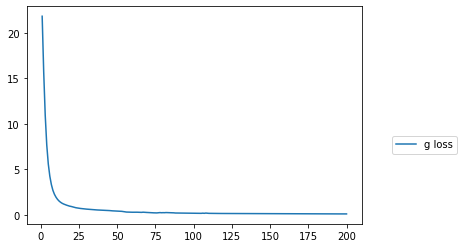

PR AUC: 0.82


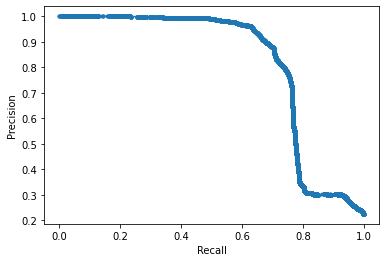

AUC: 0.86
Iteration: 2
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.026 | g_loss: 0.1404
[INFO] Training phase... Elapsed time: 456 seconds



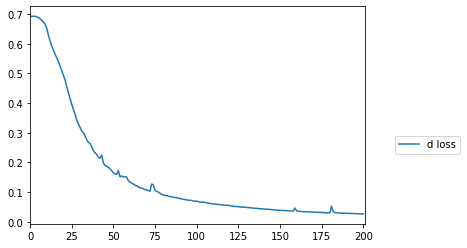

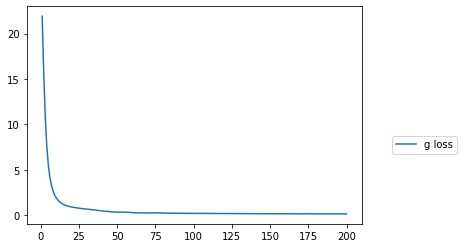

PR AUC: 0.90


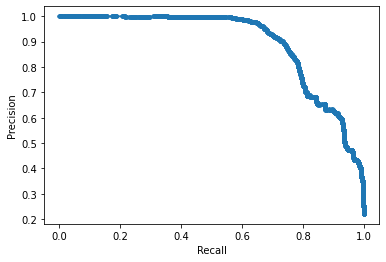

AUC: 0.96
Iteration: 3
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1332
[INFO] Training phase... Elapsed time: 476 seconds



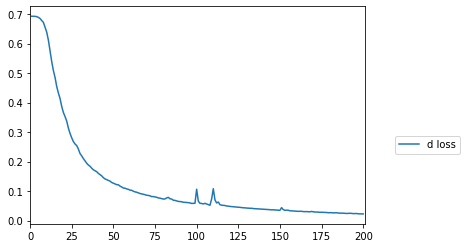

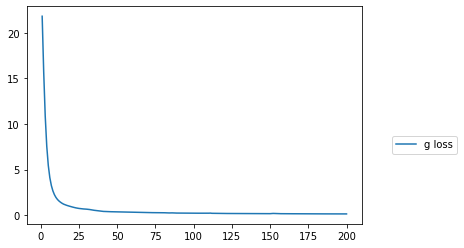

PR AUC: 0.85


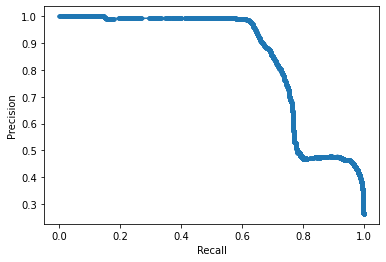

AUC: 0.93
Iteration: 4
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.024 | g_loss: 0.1062
[INFO] Training phase... Elapsed time: 473 seconds



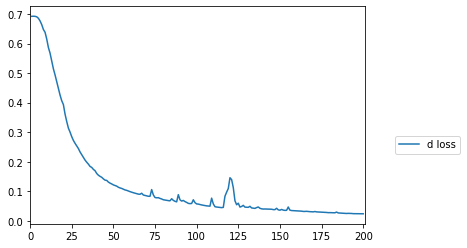

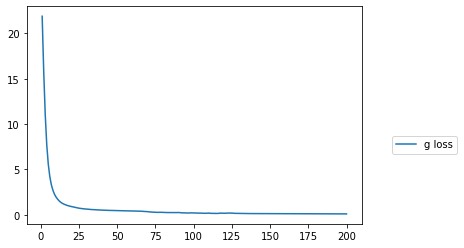

PR AUC: 0.85


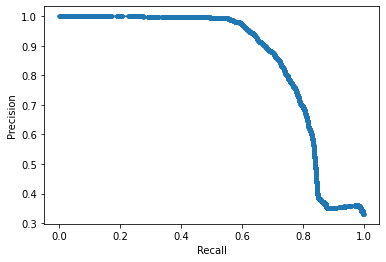

AUC: 0.92
Iteration: 5
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.045 | g_loss: 0.1438
[INFO] Training phase... Elapsed time: 483 seconds



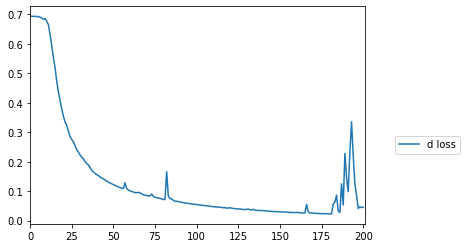

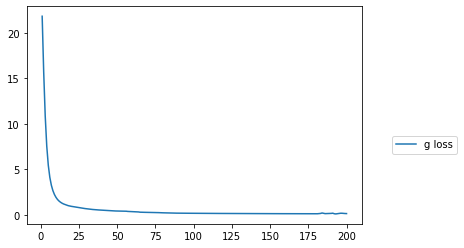

PR AUC: 0.87


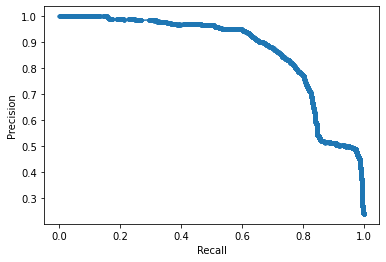

AUC: 0.95
Iteration: 6
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.019 | g_loss: 0.1292
[INFO] Training phase... Elapsed time: 493 seconds



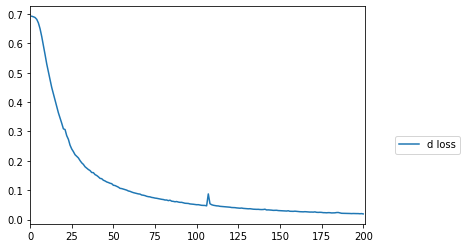

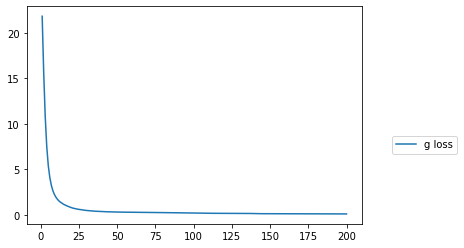

PR AUC: 0.88


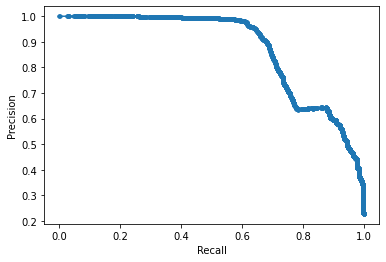

AUC: 0.95
Iteration: 7
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.019 | g_loss: 0.1170
[INFO] Training phase... Elapsed time: 490 seconds



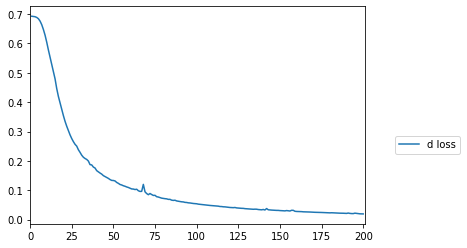

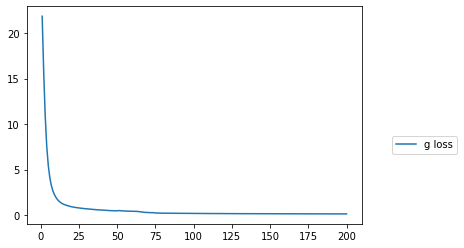

PR AUC: 0.84


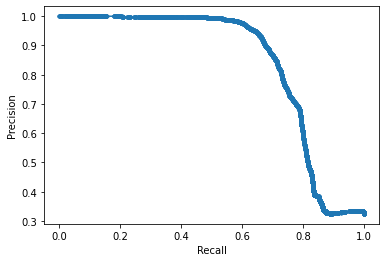

AUC: 0.90
Iteration: 8
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1128
[INFO] Training phase... Elapsed time: 482 seconds



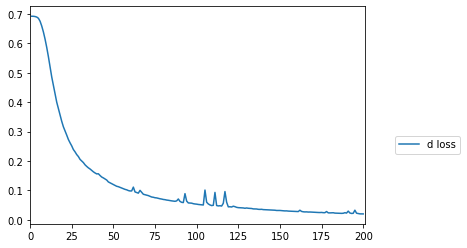

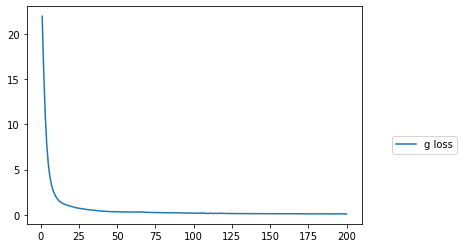

PR AUC: 0.87


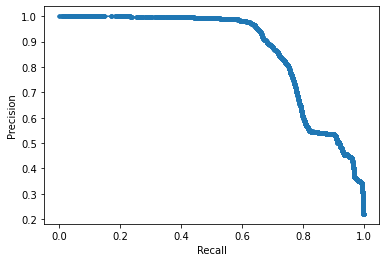

AUC: 0.94
Iteration: 9
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1084
[INFO] Training phase... Elapsed time: 458 seconds



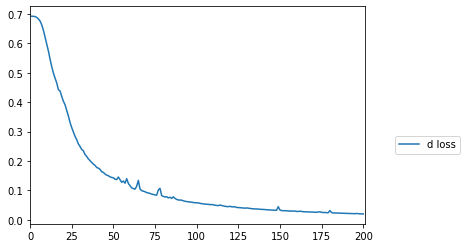

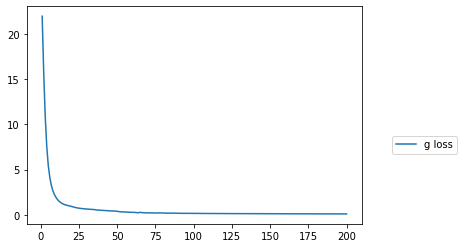

PR AUC: 0.88


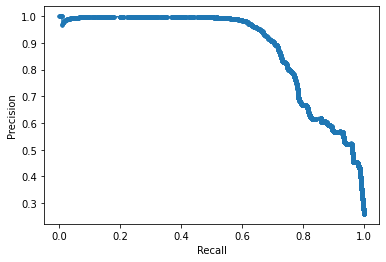

AUC: 0.95
Iteration: 10
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1389
[INFO] Training phase... Elapsed time: 459 seconds



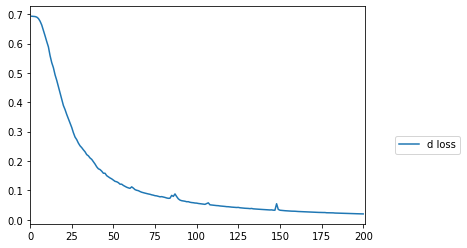

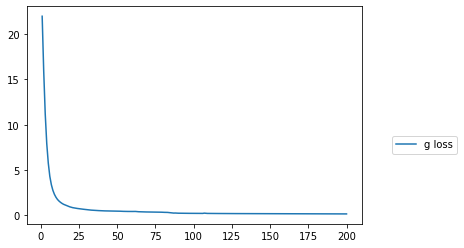

PR AUC: 0.88


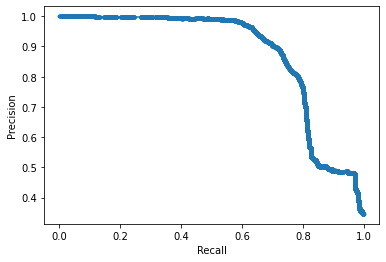

AUC: 0.94
Iteration: 11
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1136
[INFO] Training phase... Elapsed time: 455 seconds



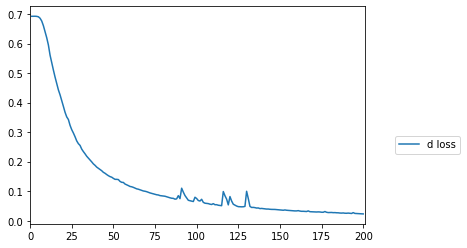

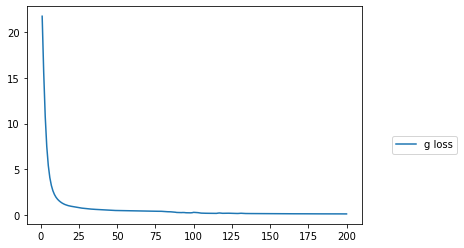

PR AUC: 0.83


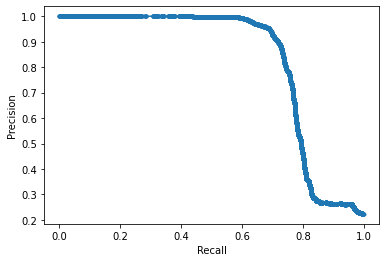

AUC: 0.86
Iteration: 12
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.035 | g_loss: 0.1195
[INFO] Training phase... Elapsed time: 460 seconds



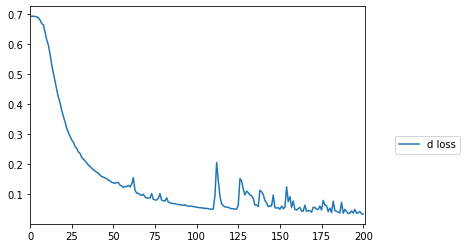

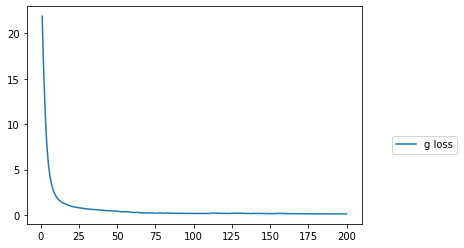

PR AUC: 0.88


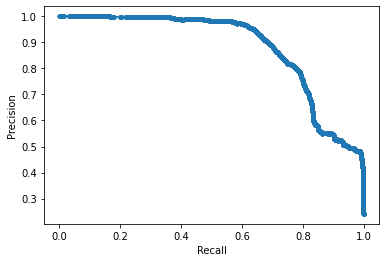

AUC: 0.95
Iteration: 13
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.020 | g_loss: 0.1346
[INFO] Training phase... Elapsed time: 491 seconds



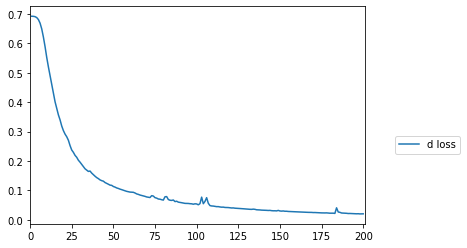

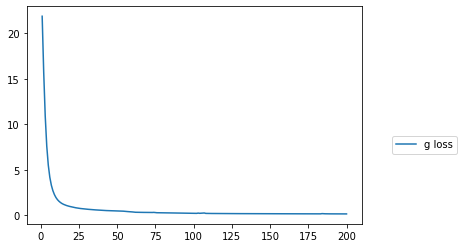

PR AUC: 0.89


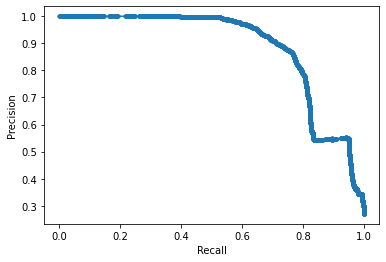

AUC: 0.95
Iteration: 14
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1057
[INFO] Training phase... Elapsed time: 490 seconds



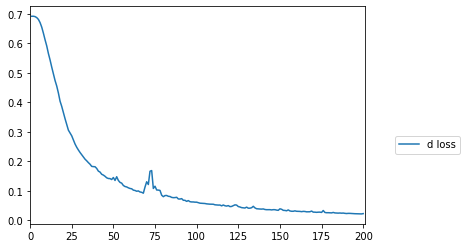

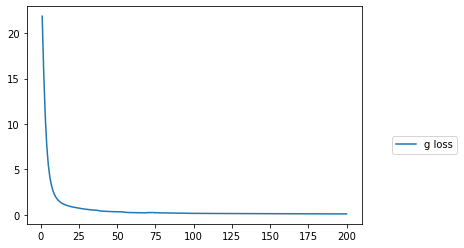

PR AUC: 0.87


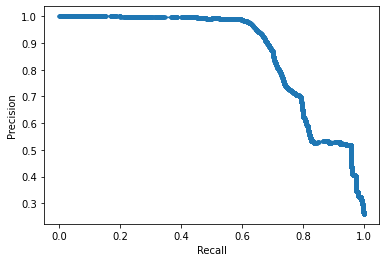

AUC: 0.94
Iteration: 15
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.033 | g_loss: 0.1172
[INFO] Training phase... Elapsed time: 497 seconds



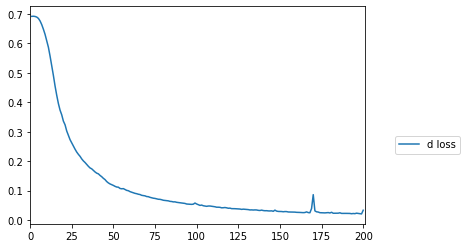

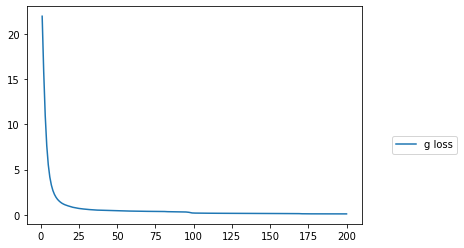

PR AUC: 0.83


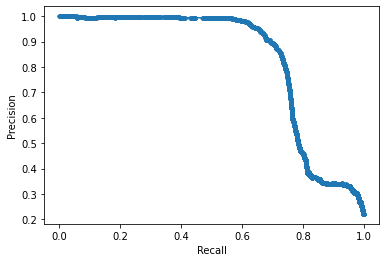

AUC: 0.89
Iteration: 16
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.042 | g_loss: 0.1235
[INFO] Training phase... Elapsed time: 494 seconds



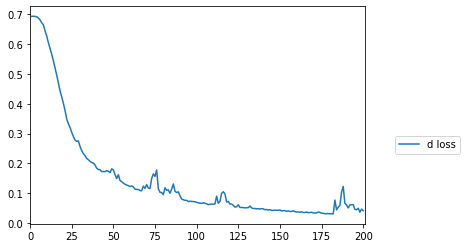

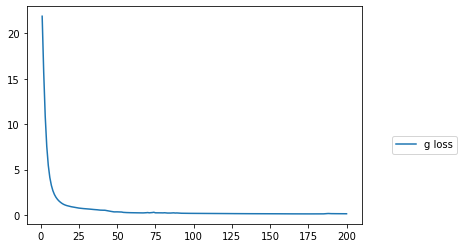

PR AUC: 0.84


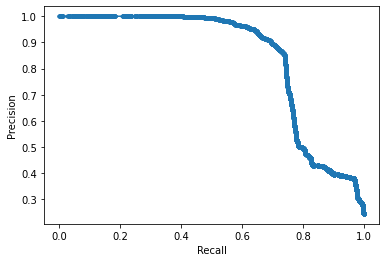

AUC: 0.91
Iteration: 17
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.023 | g_loss: 0.1126
[INFO] Training phase... Elapsed time: 482 seconds



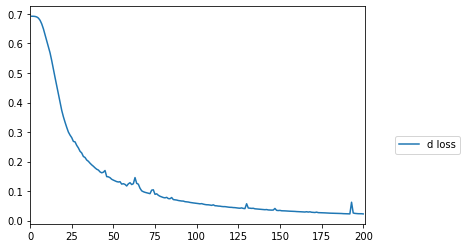

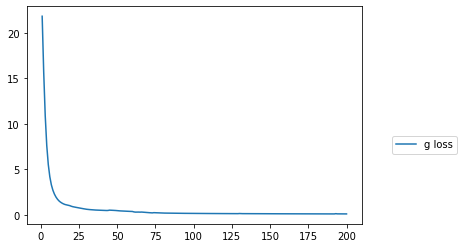

PR AUC: 0.84


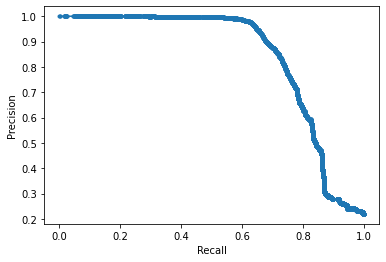

AUC: 0.88
Iteration: 18
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.021 | g_loss: 0.1208
[INFO] Training phase... Elapsed time: 477 seconds



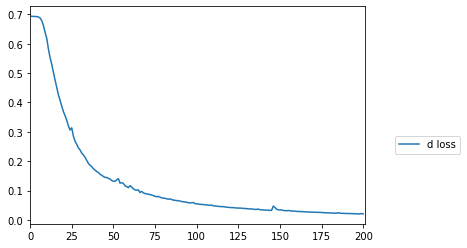

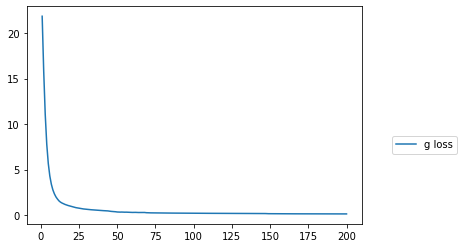

PR AUC: 0.85


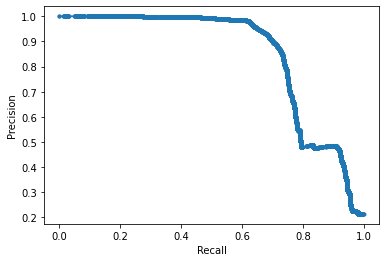

AUC: 0.90
Iteration: 19
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.021 | g_loss: 0.1240
[INFO] Training phase... Elapsed time: 458 seconds



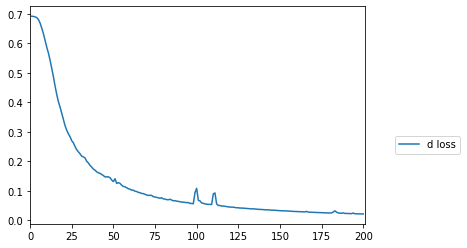

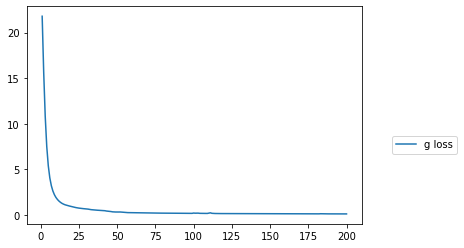

PR AUC: 0.85


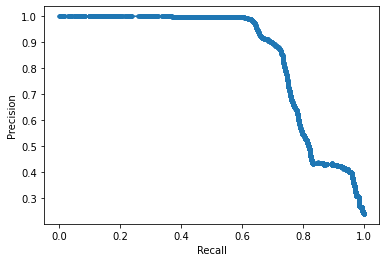

AUC: 0.92
Iteration: 20
[INFO] Starting training phase...

Epoch [200/200] | d_loss: 0.025 | g_loss: 0.1652
[INFO] Training phase... Elapsed time: 457 seconds



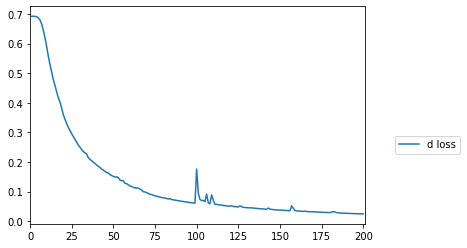

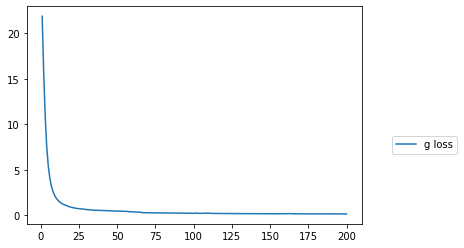

PR AUC: 0.85


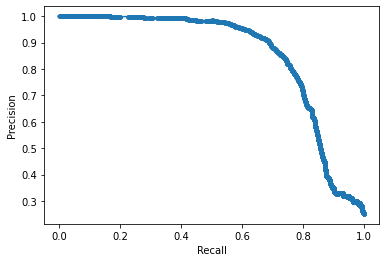

AUC: 0.91


In [6]:
n_runs = 20
auc_list = []
n_epochs = 200
seed = 42
pr_list = []

for i in range(n_runs):
    print(f'Iteration: {i+1}')
    dataset = get_KDDCUP99_REV(PATH, seed*(i+1), show=False)
    
    # Convert Normal Label in 0 and Anomalous in 1
    dataset['y_test'].replace({1:0, 0:1}, inplace = True)
    
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_train']).to(device), 
                                              torch.tensor(dataset['y_train'].to_numpy()).to(device))
    
    train_loader = DataLoader(dataset=train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_val']).to(device), 
                                              torch.tensor(dataset['y_val'].to_numpy()).to(device))
    val_loader = DataLoader(dataset=val_dataset, batch_size = batch_size, shuffle=False)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(dataset['x_test']).to(device), 
                                              torch.tensor(dataset['y_test'].to_numpy()).to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size = batch_size, shuffle=False)
    
    ganomaly = GANomaly(nc, nz, device)
    
    _auc, pr_auc = ganomaly.train_and_test(train_loader, test_loader, args, n_epochs, batch_size)
    
    print(f'AUC: {_auc:.2f}')
    auc_list.append(_auc)
    pr_list.append(pr_auc)

In [7]:
meanAUC_PRAUC(auc_list, pr_list, 'GANomaly_KDDCUP99_Rev')

AUC:
[0.8610688464971289, 0.9554116258507371, 0.9281441257033053, 0.9158869844816255, 0.9455319423721671, 0.9465877216810619, 0.9020595297278914, 0.936548333216712, 0.9508392558114332, 0.9421485240071326, 0.8564304759279874, 0.9506464359764816, 0.9456952122013795, 0.9375456236301452, 0.889620517833231, 0.9115210698034031, 0.8805205547344532, 0.9014572621615398, 0.9162821983024623, 0.9112792333712532]
**************
PR AUC:
[0.8152242184366837, 0.8981135683394421, 0.8504834626657841, 0.8535212928158109, 0.8699026423172902, 0.8751025376596403, 0.8403953907971664, 0.8678082990180943, 0.8845853480568128, 0.875693669308897, 0.8265591933626425, 0.8818637165614651, 0.8855380061405953, 0.8670119912566153, 0.8307091020990249, 0.8432584675766508, 0.840926454765162, 0.8471853078336704, 0.8519798975261238, 0.8532627396497893]
**************
AUC
0.92 +/- 0.01
95% confidence level, average auc would be between 0.91 and 0.93
**************
PR AUC
0.86 +/- 0.01
95% confidence level, average auc would 

---